# Projeto: Análise Exploratória dos Dados de Gorjeta

## Sobre o Projeto:
    
Este projeto é resultado do treinamento <b> Data Visualization: Explorando com Seaborn</b> da Alura, em que foi utilizado os dados disponíbeis pela biblioteca Seaborn e previamente tratadas.

## Informações Importantes:
<sub><i> *Dados Fictícios </i><sub><br>
   
## Objetivo: 

Analisar uma <b>amostra</b> dos dados e responder as seguintes questões:
    
1. O Valor da conta influência no valor da gorjeta?
2. Entre as pessoas que pediram e as que não pediram sobremesa há diferença no valor da gorjeta oferecida?
3. O dia da semena influencia no valor da gorjeta?
4. Qual hora do dia as gorjetas são maiores? E menores?

#### Importando as bibliotecas

In [1]:
import pandas as pd
!pip show pandas

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\natalia\anaconda3\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn


In [2]:
import seaborn as sns
sns.set_theme(style="ticks", palette="rocket")#registrando tema
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\natalia\anaconda3\lib\site-packages
Requires: matplotlib, pandas, numpy, scipy
Required-by: 


#### Importando base de dados

In [3]:
# lendo o dataset 
dados = pd.read_csv('dados/tips.csv', sep=',')

In [4]:
# Visualizando o tamanho do dataset
print('A base de dados contém {} linhas e {} colunas'.format(dados.shape[0],dados.shape[1]))

A base de dados contém 244 linhas e 6 colunas


In [5]:
# Visualizando resumo das informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [6]:
# Visualizando uma amostra dos dados
dados.sample(5)

,total_bill,tip,dessert,day,time,size
37,16.93,3.07,No,Sat,Dinner,3
154,19.77,2.00,No,Sun,Dinner,4
102,44.30,2.50,Yes,Sat,Dinner,3
72,26.86,3.14,Yes,Sat,Dinner,2
147,11.87,1.63,No,Thur,Lunch,2


#### Traduzindo dados -  etapa apenas para fins didáticos!

In [7]:
# Verificando o nome das colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
# Renomeando as colunas

#criando um dicionário onde a chave é o objeto atual e o valor é o objeto que devera substituir o atual
renomear = {
    'total_bill':'total_conta', 
    'tip':'gorjeta', 
    'dessert':'sobremesa', 
    'day':'dia_da_semana', 
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'    
}

#criando novo dataframe 
gorjetas = dados.rename(columns=renomear)
gorjetas.head(5)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
# Renomeando campo sobremesa

#visualizando os dados da variável com o método unique()
gorjetas.sobremesa.unique()

#criando dicionário
sim_não = {
    'No':'Não', 
    'Yes':'Sim'
}

#trocando os valores da coluna usando a função map()
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_não)
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [10]:
# Renomeando campo dia da semana

#visualizando os dados da variável com o método unique()
gorjetas.dia_da_semana.unique()

#criando dicionário
semana = {
    'Sun':'Dom', 
    'Sat':'Sáb', 
    'Thur':'Qui', 
    'Fri':'Sex'
}

#trocando os valores da coluna usando a função map()
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(semana)
gorjetas.dia_da_semana.unique()

array(['Dom', 'Sáb', 'Qui', 'Sex'], dtype=object)

In [11]:
# Renomeando campo hora do dia

#visualizando os dados da variável com o método unique()
gorjetas.hora_do_dia.unique()

#criando dicionário
hora = {
   'Dinner':'Jantar', 
    'Lunch':'Almoço'
}

#trocando os valores da coluna usando a função map()
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

### Primeira Análise: O Valor da conta influência no valor da gorjeta?

#### Visualizando os dados através de um gráfico de dispersão

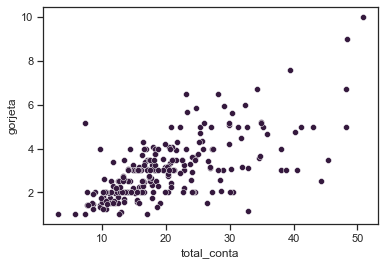

In [19]:
# Gráfico 01: Valor Total da Conta x Valor da Gorjeta
fig1 = sns.scatterplot(x='total_conta', y='gorjeta', data=gorjetas)

<b>Visualmente</b> o valor da gorjeta aumenta conforme o valor da conta

#### Analisando se o crescimento é proporcional

In [13]:
# Criando uma nova coluna com o percentual da gorjeta em relação ao valor da conta
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['total_conta']).round(3)

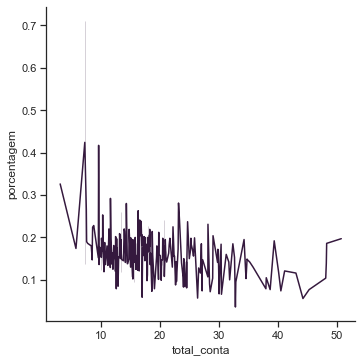

In [18]:
# Gráfico 02: Valor Total da Conta x Porcentagem da Gorjeta
fig2 = sns.relplot(x='total_conta', y='porcentagem', kind='line', data=gorjetas)

<b>Visualmente</b> o valor da conta não é proporcional ao valor da gorjeta

In [ ]:
gorjetas.head(1)